# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [ ]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [ ]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

# Create training set and define training dataloader
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create test set and define test dataloader
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

The transforms chosen for the MNIST dataset are ToTensor() and Normalize(). The ToTensor() transform converts the PIL image or NumPy array to a PyTorch tensor with values ranging from 0 to 1. The Normalize() transform normalizes the tensor image with mean and standard deviation. In this case, the mean and standard deviation values of 0.1307 and 0.3081 are used, which are the global mean and standard deviation of the MNIST dataset.

These transforms are important preprocessing steps because they help to standardize the input data, making it easier for the neural network to learn from the data. Normalizing the data can also help to improve the training speed and performance of the neural network.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [ ]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


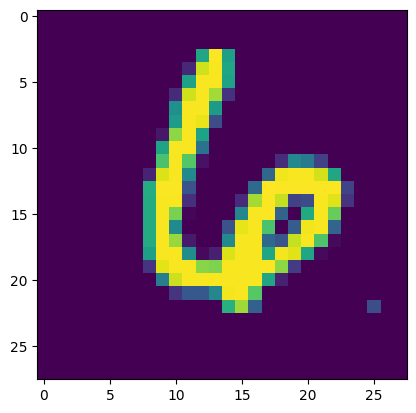

9


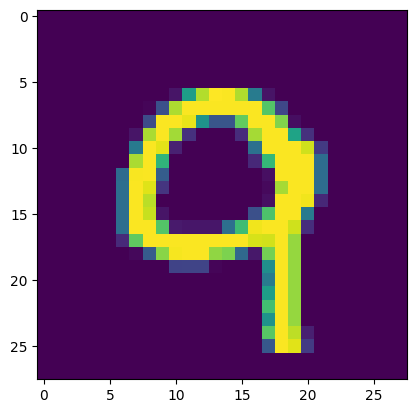

6


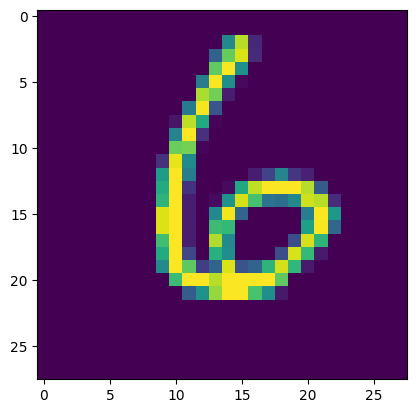

1


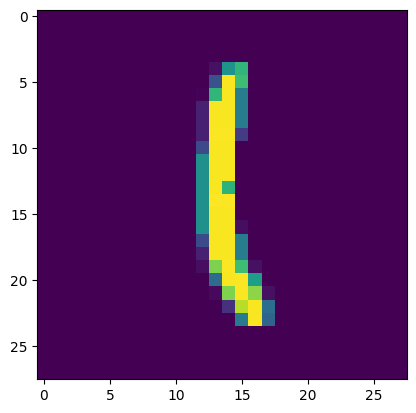

7


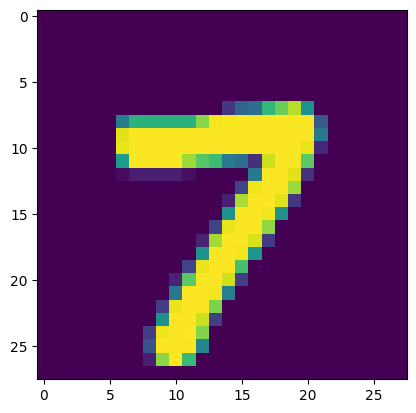

In [ ]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model
net = Net()
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

    The transforms chosen for the MNIST dataset are ToTensor() and Normalize(). The ToTensor() transform converts the PIL image or NumPy array to a PyTorch tensor with values ranging from 0 to 1. The Normalize() transform normalizes the tensor image with mean and standard deviation. In this case, the mean and standard deviation values of 0.1307 and 0.3081 are used, which are the global mean and standard deviation of the MNIST dataset.

    These transforms are important preprocessing steps because they help to standardize the input data, making it easier for the neural network to learn from the data. Normalizing the data can also help to improve the training speed and performance of the neural network.

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [ ]:
train_loss_history = list()
val_loss_history = list()

In [ ]:
def train_model (net, num_epochs=8, learning_rate=0.005):
    # We can define our optimizer and loss here, or outside of the training loop and pass them in as parameters.
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    correct = 0
    total = 0

    # Iterate over the number of ebochs specified
    for epoch in range(num_epochs):
        # Put the model into training mode
        net.train()
        # Set the epoch loss to zero
        train_loss = 0.0
        # Set the number of correct predictions to zero.
        train_correct = 0
        # Loop over the data in the training data loader. The 'data variable contains one batch
        # We use enumerate so that if we have too much data, we can print a status during the epoch.
        for i, data in enumerate(train_loader):
            # Get inputs and labels from our batch
            inputs, labels = data
            # Pass inputs and labels to GPU if available
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            # Zero out the gradient of the optimizer
            optimizer.zero_grad()
            # Get the output logits from the model
            outputs = net(inputs)
            # Compute the cross entropy loss between the outputs and the labels
            loss = criterion(outputs, labels)
            # Compute the gradient of the loss with respect to the parameters
            loss.backward()
            # Update the parameters by taking a step with the optimizer
            optimizer.step()

            # Get class predictions from the outputs
            _, preds = torch.max(outputs.data, 1)
            # Update the number of correct predictions for the epoch
            train_correct += (preds == labels).sum().item()
            # Update the running loss
            train_loss += loss.item()

        # Print the running accuracy and loss in the notebook
        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
        train_loss_history.append(train_loss/len(train_loader))

        # Perform validation (This is actually the test set, so this is a bad practice!)
        val_loss = 0.0
        val_correct = 0
        net.eval()
        for inputs, labels in test_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()

        # Print validation to the notebook
        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
        # # Calculate the accuracy
        val_loss_history.append(val_loss/len(test_loader))

    def val_accuracy():
        total += labels.size(0)
        accuracy = 100 * val_correct / total
        return f'Validation Accuracy: {accuracy}%'


In [ ]:
train_model(net)

Epoch 1 training accuracy: 27.42% training loss: 0.45012
Epoch 1 validation accuracy: 30.31% validation loss: 0.17125
Epoch 2 training accuracy: 30.44% training loss: 0.15786
Epoch 2 validation accuracy: 30.55% validation loss: 0.13657
Epoch 3 training accuracy: 30.88% training loss: 0.11142
Epoch 3 validation accuracy: 30.94% validation loss: 0.10331
Epoch 4 training accuracy: 31.08% training loss: 0.09109
Epoch 4 validation accuracy: 31.13% validation loss: 0.07986
Epoch 5 training accuracy: 31.24% training loss: 0.07472
Epoch 5 validation accuracy: 30.59% validation loss: 0.13900
Epoch 6 training accuracy: 31.38% training loss: 0.06114
Epoch 6 validation accuracy: 31.06% validation loss: 0.09079
Epoch 7 training accuracy: 31.46% training loss: 0.05345
Epoch 7 validation accuracy: 31.23% validation loss: 0.07301
Epoch 8 training accuracy: 31.54% training loss: 0.04452
Epoch 8 validation accuracy: 31.23% validation loss: 0.07224


Plot the training loss (and validation loss/accuracy, if recorded).

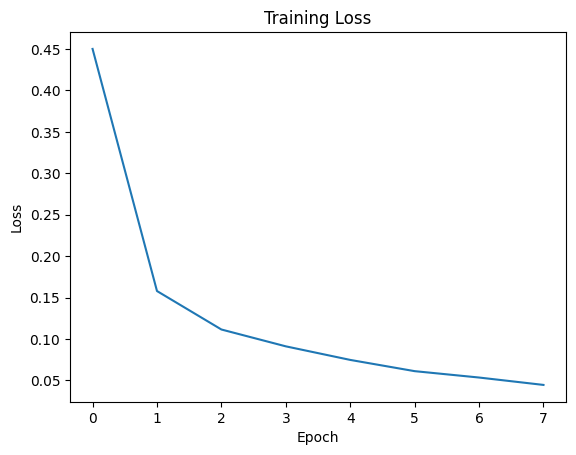

In [ ]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:

# print(train_model.val_accuracy())

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(16* 7* 7, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(p=0.8)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()


In [ ]:
train_model(net)

Epoch 1 training accuracy: 9.21% training loss: 1.90623
Epoch 1 validation accuracy: 19.87% validation loss: 1.29424
Epoch 2 training accuracy: 9.97% training loss: 1.81101
Epoch 2 validation accuracy: 22.35% validation loss: 1.32585
Epoch 3 training accuracy: 10.31% training loss: 1.78849
Epoch 3 validation accuracy: 20.17% validation loss: 1.27762
Epoch 4 training accuracy: 10.55% training loss: 1.76900
Epoch 4 validation accuracy: 20.24% validation loss: 1.26128
Epoch 5 training accuracy: 11.01% training loss: 1.74175
Epoch 5 validation accuracy: 22.52% validation loss: 1.18272
Epoch 6 training accuracy: 11.24% training loss: 1.72155
Epoch 6 validation accuracy: 22.96% validation loss: 1.09411
Epoch 7 training accuracy: 11.12% training loss: 1.72647
Epoch 7 validation accuracy: 20.90% validation loss: 1.23408
Epoch 8 training accuracy: 11.10% training loss: 1.72488
Epoch 8 validation accuracy: 21.99% validation loss: 1.20423


In [ ]:
# print(train_model.val_accuracy())

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##
# Specify the path to save the model
model_path = './mnist_model.pth'

# Save the model
torch.save(model.state_dict(), model_path)
